In [96]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ptitprince import RainCloud
from Levenshtein import distance

In [97]:
EXP_PATH = Path.cwd()
ROOT_DIR = EXP_PATH.parents[2]
exp_name = EXP_PATH.name
RAW_DATA_DIR = ROOT_DIR / 'data' / 'original_data'
DATA_DIR = ROOT_DIR / 'data' / 'kaggle_dataset' / 'irohith_tfrecords'
SAVE_DIR = ROOT_DIR / 'outputs' / exp_name
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# check oof

In [98]:
oof_0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'oof_df.csv')
oof_1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'oof_df.csv')
oof_2_df = pd.read_csv(SAVE_DIR / 'fold2' / 'oof_df.csv')
oof_3_df = pd.read_csv(SAVE_DIR / 'fold3' / 'oof_df.csv')

oof_df = pd.concat([oof_0_df, oof_1_df, oof_2_df, oof_3_df], axis=0)
oof_df['pred'] = oof_df['pred'].fillna('').astype(str)
oof_df['len_phrase'] = oof_df['phrase'].apply(lambda x: len(x))
oof_df['len_pred'] = oof_df['pred'].apply(lambda x: len(x))

train_df = pd.read_csv(ROOT_DIR / 'data' / 'created_data' / 'train2.csv')
oof_df = oof_df.merge(train_df[['sequence_id', 'file_id', 'n_frames', 'dominant_hand', 'n_frames_hand']], on='sequence_id', how='left')

### scoreの分布

<Axes: ylabel='Frequency'>

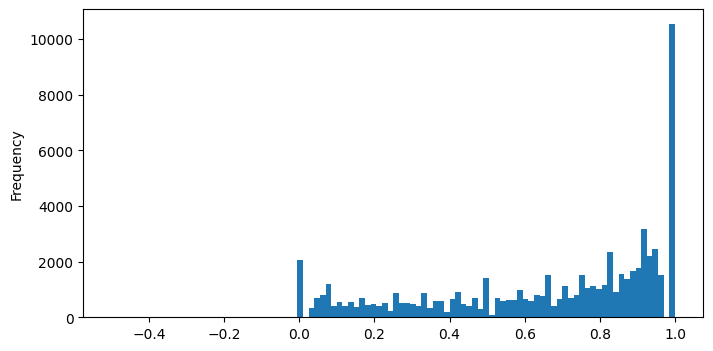

In [100]:
oof_df['score'].plot(kind='hist', bins=100, figsize=(8, 4))

In [102]:
oof_df['score'].describe()

count    67275.000000
mean         0.661260
std          0.312581
min         -0.500000
25%          0.428571
50%          0.761905
75%          0.923077
max          1.000000
Name: score, dtype: float64

<Axes: xlabel='len_phrase'>

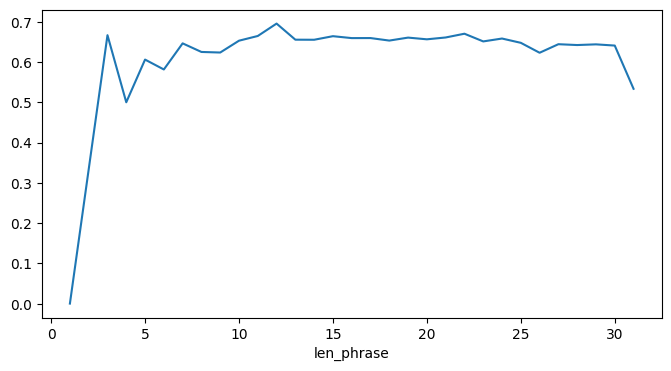

In [103]:
# targetの長さとscoreの関係
oof_df.groupby('len_phrase')['score'].mean().plot(figsize=(8, 4))

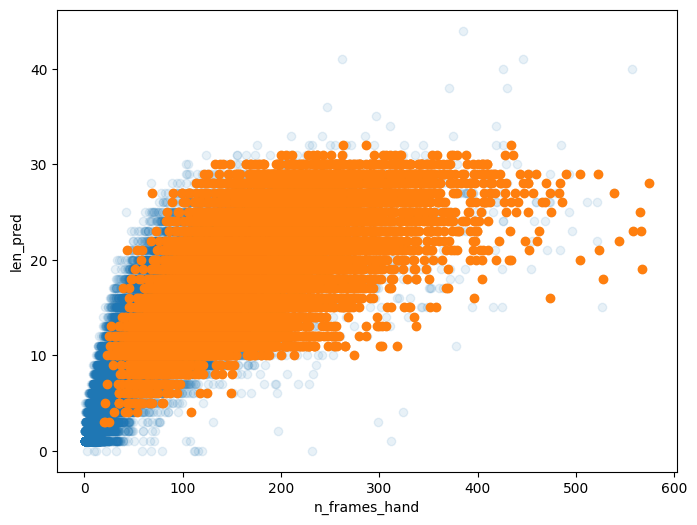

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(oof_df['n_frames_hand'], oof_df['len_pred'], alpha=0.1)
oof_low_df = oof_df.query('score > 0.9')
ax.scatter(oof_low_df['n_frames_hand'], oof_low_df['len_pred'], alpha=1)
ax.set_xlabel('n_frames_hand')
ax.set_ylabel('len_pred')
plt.show()

In [106]:
score = []
for pred, target in oof_df[['pred', 'phrase']].values:
    N = len(target)
    D = distance(pred, target)
    score.append((N - D) / N)
np.mean(score)

0.6611406703671778

In [73]:
oof_df['limit_pred'] = (oof_df['n_frames_hand'] // 3).astype(int)

In [74]:
oof_df

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,len_pred_per_frames,limit_pred,pred_clip
0,1494438637,gladys guzman,gadys gzan,0.769231,0,13,10,296317215,107,right,53,0.188679,17,gadys gzan
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0,13,11,296317215,98,right,47,0.234043,15,8780 old 3h
2,1494472407,+62-879-37-82,,0.000000,0,13,1,296317215,185,left,39,0.025641,13,
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0,30,26,296317215,241,left,191,0.136126,63,www.cia-ycb.com/arduinopro
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0,22,22,296317215,133,right,108,0.203704,36,7642 south beulah road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67282,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3,21,17,2036580525,130,left,75,0.226667,25,wwkmi-fod.nl/week
67283,1399698197,www.hayano.co.jp,aci,0.125000,3,16,3,2036580525,52,right,6,0.500000,2,aci
67284,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3,24,21,2036580525,235,right,213,0.098592,71,anthropology/1hefanar
67285,1399765965,ericka tran,eia tran,0.727273,3,11,8,2036580525,67,right,42,0.190476,14,eia tran


In [75]:
oof_df['pred_clip'] = oof_df.apply(lambda x: x['pred'][:x['limit_pred']], axis=1)

In [76]:
score = []
for pred, target in oof_df[['pred_clip', 'phrase']].values:
    N = len(target)
    D = distance(pred, target)
    score.append((N - D) / N)
np.mean(score)

0.6526952207246846

In [79]:
oof_0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'oof_df.csv')
oof_1_df = pd.read_csv(SAVE_DIR / 'fold1' / 'oof_df.csv')
oof_2_df = pd.read_csv(SAVE_DIR / 'fold2' / 'oof_df.csv')
oof_3_df = pd.read_csv(SAVE_DIR / 'fold3' / 'oof_df.csv')

oof_df = pd.concat([oof_0_df, oof_1_df, oof_2_df, oof_3_df], axis=0)

In [82]:
oof_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gadys gzan,0.769231,0
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0
2,1494472407,+62-879-37-82,,0.000000,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
...,...,...,...,...,...
16995,1399691845,www.kmi-foods.nl/week,wwkmi-fod.nl/week,0.809524,3
16996,1399698197,www.hayano.co.jp,aci,0.125000,3
16997,1399701872,anthropology/1the9fanart,anthropology/1hefanar,0.875000,3
16998,1399765965,ericka tran,eia tran,0.727273,3


In [27]:
oof_score1_df['len_pred_per_frames'] = oof_score1_df['len_pred'] / oof_score1_df['n_frames_hand']

/var/folders/s8/kn1s0g_s407d23sqsmvzcql80000gn/T/ipykernel_49070/1521451456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oof_score1_df['len_pred_per_frames'] = oof_score1_df['len_pred'] / oof_score1_df['n_frames_hand']


In [33]:
oof_score1_df.query('len_pred_per_frames > 0.33')

,sequence_id,phrase,pred,score,fold,len_phrase,len_pred,file_id,n_frames,dominant_hand,n_frames_hand,len_pred_per_frames
3341,743296616,918 gulden,918 gulden,1.0,0,10,10,638508439,78,right,29,0.344828
18056,1528908859,711 acker hill,711 acker hill,1.0,1,14,14,149822653,60,right,42,0.333333
22348,960169277,144 elevation road,144 elevation road,1.0,1,18,18,568753759,61,right,48,0.375000
46655,270879238,brock hess,brock hess,1.0,2,10,10,1358493307,38,right,29,0.344828
57271,164865603,35 east 155th road,35 east 155th road,1.0,3,18,18,1134756332,134,right,49,0.367347
62359,1624854310,brandee tran,brandee tran,1.0,3,12,12,1785039512,78,right,32,0.375000
62538,1630190361,ricky vang,ricky vang,1.0,3,10,10,1785039512,75,right,28,0.357143
65359,702344016,www.chazelles.com,www.chazelles.com,1.0,3,17,17,1997878546,96,right,39,0.435897


In [24]:
oof_df.query('0.70 > score > 0.67')

,sequence_id,phrase,pred,score,fold,file_id,n_frames,dominant_hand,n_frames_hand
67,1496895614,3355 east 1st alley,east 1st aley,0.684211,0,296317215,105,right,72
68,1496903777,insights.princeton.edu,klinsighs.prncettedu,0.681818,0,296317215,210,right,130
113,1498322106,search?q=%23parisvsreal,searcz-11%23parisv2sre,0.695652,0,296317215,307,right,192
152,1499446600,doris patrick,doris parn,0.692308,0,296317215,58,right,31
169,1500121785,6691 lake mar,69 ake mor,0.692308,0,296317215,61,right,24
...,...,...,...,...,...,...,...,...,...
67172,1396068381,/nashwanhaarstudio/ulysses-ne,nashwanharst80/vliyses-ne,0.689655,3,2036580525,180,right,144
67255,1398705011,bell+bottoms/theaudreyjane,bellbo-oms/theaurdreyk,0.692308,3,2036580525,215,right,183
67259,1398847274,entersandman666.blogspot.com/,entsanman6.logspot.m,0.689655,3,2036580525,357,right,186
67270,1399293351,https://www.vetroq.com,https://ww.n.com,0.681818,3,2036580525,163,right,34


# check score

In [85]:
valid_result_fold0_df = pd.read_csv(SAVE_DIR / 'fold0' / 'valid_result.csv').fillna('').astype(str)

In [86]:
valid_result_fold0_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch10,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysan,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780ol d 3h,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,ww.ci-ycbcom/arduinopro,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulah rod,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7868 co road 3487,,78600348,7586001347,7758680roa48,57868ro348,786580roa348,78680r013487,78600a347,7868 0roa34,...,57868 co road 34,5786 oroa348,578658 co road 34,57868 co road 3488,7868 co road 348,5786 co road 348,786 co road 348,7868 co road 348,7868 co road 348,7868 co road 348
11285,kathleen peralta,,athlenperalta,athlenperalta,kathlen peralta,athlenperalta,athlen peralta,kathlenperalta,kathlenperalta,kathlen peralta,...,athlen peralta,kathlenperalta,pathlen peralta,kathlenperalta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta
11286,custo-de-vida,,cuatoeida,custo-de-vida,crsto-de-2ida,crsto-de-vida,crst-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,...,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida
11287,alexis good,,ecod,leisod,lexiood,exisco,id,leicood,leood,lxcood,...,leood,alexisood,lexiood,lexisood,lexis ood,lexisood,lexisood,lexis good,lexisood,lexis ood


In [87]:
score = []
for pred, target in valid_result_fold0_df[['pred_epoch19', 'target']].values:
    N = len(target)
    D = distance(pred, target)
    score.append((N - D) / N)
np.mean(score)

0.8525875992551513

In [8]:
from Levenshtein import distance as Lev_distance
def calculate_N_D(s1, s2):
    l = len(s1)
    lvd = Lev_distance(s1, s2)
    return lvd, l
    
global_N, global_D = 0, 0
for target_strings, predict_strings in valid_result_fold0_df[['target', 'pred_epoch5']].values:
    values = [calculate_N_D(target, predict) for target, predict in zip(target_strings, predict_strings)]
    global_D += np.sum([x[0] for x in values])
    global_N += np.sum([x[1] for x in values])

metric_value = np.clip((global_N - global_D) / global_N, a_min=0, a_max=1)

In [9]:
metric_value

0.3669542313243716

In [88]:
valid_result_fold0_df

,target,pred_epoch0,pred_epoch1,pred_epoch2,pred_epoch3,pred_epoch4,pred_epoch5,pred_epoch6,pred_epoch7,pred_epoch8,...,pred_epoch10,pred_epoch11,pred_epoch12,pred_epoch13,pred_epoch14,pred_epoch15,pred_epoch16,pred_epoch17,pred_epoch18,pred_epoch19
0,gladys guzman,,adysa,gadysga,gadisa,adisa,gadysga,gadisan,gadysa,adyszan,...,gadysan,gadysgan,gadys gzan,gadyszan,gadys gzan,gadys qgzan,gadys qgzan,gadys gan,gadys gan,gadys gzan
1,8780 old 13th,,8780l3,8780ld3,878ld3 h,8783,8783h,878l3h,878d3h,8780 l 3h,...,8780ol d 3h,8780 ol 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 ol d 3h,8780 old 3h,8780 old 3h,8780 old 3h,8780 old 3h
2,www.china-ycyb.com/arduinoprof,,w.ciycbom/rdiopo,ww.miycibcom/oarduiopuro,w.i.ycbcom/arduinopro,w.ci-ycbcom/arduinopro,w.chiycbcm/aruiopro,w.ci-ycbcm/arduinopro,ww.chi-ycbom/arduinopro,.chi-ycb.om/arduinopro,...,ww.ci-ycbcom/arduinopro,www.i-ycbom/sarduinopro,ww.chi-ycb.com/arduinopro,ww.cmi-ycb.com/arduinopro,www.ci-ycyb.com/arduinopro,www.cmi-ycb.com/arduinopro,ww.ci-ycb.com/arduinopro,www.ci-ycb.com/arduinopro,www.cia-ycb.com/arduinopro,www.cia-ycb.com/arduinopro
3,7642 south beulah road,,7642sorthbberlahro,764 2southbeulahro,7642 esorthbbeulahrod,7642 sorth berlahro,7642 sorth berlh ro,7642 sorth beulho,7642 sourth berlhrod,7642 sorth beulah rod,...,7642 south beulah rod,7642 south beulh rod,7642 south beulh road,7642 south beulah rod,7642 south beulth road,7642 south beulh road,7642 south beulah road,7642 south beulah road,7642 south beulah road,7642 south beulah road
4,+682-45-4328-458,+,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-58,+682-45-4328-458,+682-45-4328-458,...,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458,+682-45-4328-458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7868 co road 3487,,78600348,7586001347,7758680roa48,57868ro348,786580roa348,78680r013487,78600a347,7868 0roa34,...,57868 co road 34,5786 oroa348,578658 co road 34,57868 co road 3488,7868 co road 348,5786 co road 348,786 co road 348,7868 co road 348,7868 co road 348,7868 co road 348
11285,kathleen peralta,,athlenperalta,athlenperalta,kathlen peralta,athlenperalta,athlen peralta,kathlenperalta,kathlenperalta,kathlen peralta,...,athlen peralta,kathlenperalta,pathlen peralta,kathlenperalta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta,kathlen peralta
11286,custo-de-vida,,cuatoeida,custo-de-vida,crsto-de-2ida,crsto-de-vida,crst-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,...,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida,custo-de-vida
11287,alexis good,,ecod,leisod,lexiood,exisco,id,leicood,leood,lxcood,...,leood,alexisood,lexiood,lexisood,lexis ood,lexisood,lexisood,lexis good,lexisood,lexis ood


In [90]:
oof_0_df

,sequence_id,phrase,pred,score,fold
0,1494438637,gladys guzman,gadys gzan,0.769231,0
1,1494454903,8780 old 13th,8780 old 3h,0.846154,0
2,1494472407,+62-879-37-82,,0.000000,0
3,1494503729,www.china-ycyb.com/arduinoprof,www.cia-ycb.com/arduinopro,0.866667,0
4,1494515517,7642 south beulah road,7642 south beulah road,1.000000,0
...,...,...,...,...,...
16995,1975215809,409 locust place north,ce na,0.227273,0
16996,1975251416,custo-de-vida,custo-de-vida,1.000000,0
16997,1975337682,alexis good,lexis ood,0.818182,0
16998,1975349526,7617 west winchester court,7617 west winchester court,1.000000,0


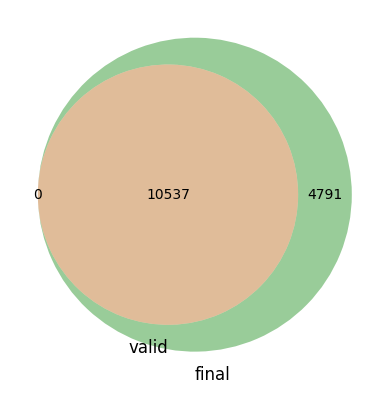

In [94]:
# create venn
import matplotlib_venn as venn
import matplotlib.pyplot as plt

venn.venn2(subsets = (set(valid_result_fold0_df['target'].unique()), set(oof_0_df['phrase'].unique())), set_labels = ('valid', 'final'))
# set(valid_result_fold0_df['target'].unique())